<a href="https://colab.research.google.com/github/SarraChebaane/Machine-Learning-Projects-for-Beginners/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection

In [197]:
# loading the dataset from csv file to a Pandas DataFrame

big_mart_data = pd.read_csv('/content/Train.csv')

In [198]:
# first 5 rows of the DataFrame 

big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [199]:
# number of data points and number of feature
big_mart_data.shape

(8523, 12)

In [200]:
# getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical features: 
- Item_identifier
- Item_fat_content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [201]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average value
Mode --> Most repeated value

In [202]:
# mean value of "item_Weight" column

big_mart_data['Item_Weight'].mean()

12.857645184135976

In [203]:
# filling the missing values in "Item_Weight" column with "Mean" value

big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace = True)

In [204]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in "Outlet_Size" with mode

In [205]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns = "Outlet_Type", aggfunc = (lambda x: x.mode()[0]))

In [206]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [207]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [208]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [209]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [210]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Data Analysis

In [211]:
# statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [212]:
sns.set()

<Figure size 432x432 with 0 Axes>

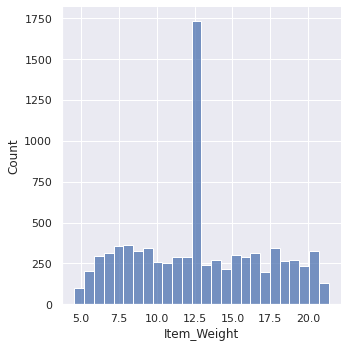

In [213]:
# item_weight distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

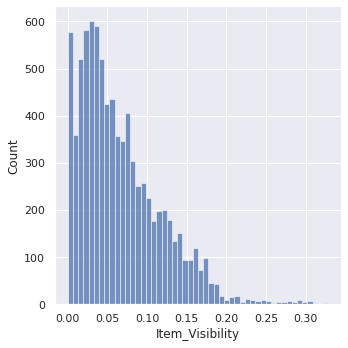

In [214]:
# item_Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

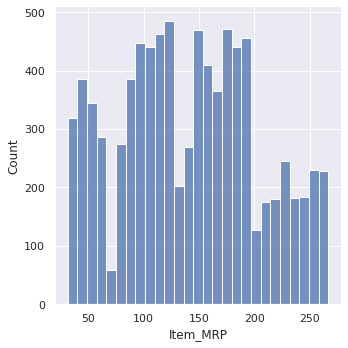

In [215]:
# item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_MRP'])
plt.show()


<Figure size 432x432 with 0 Axes>

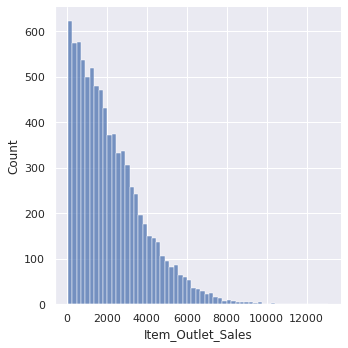

In [216]:
# item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Outlet_Sales'])
plt.show()
# This is a normal distribution

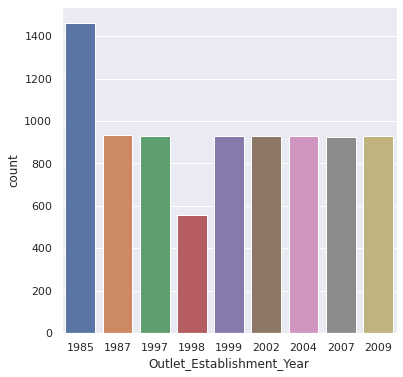

In [217]:
# Outlet_Establishment distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data = big_mart_data)
plt.show()

Categorical features

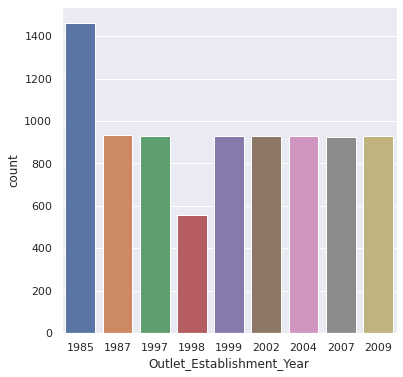

In [218]:
# Item_Fat_Content distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data = big_mart_data)
plt.show()

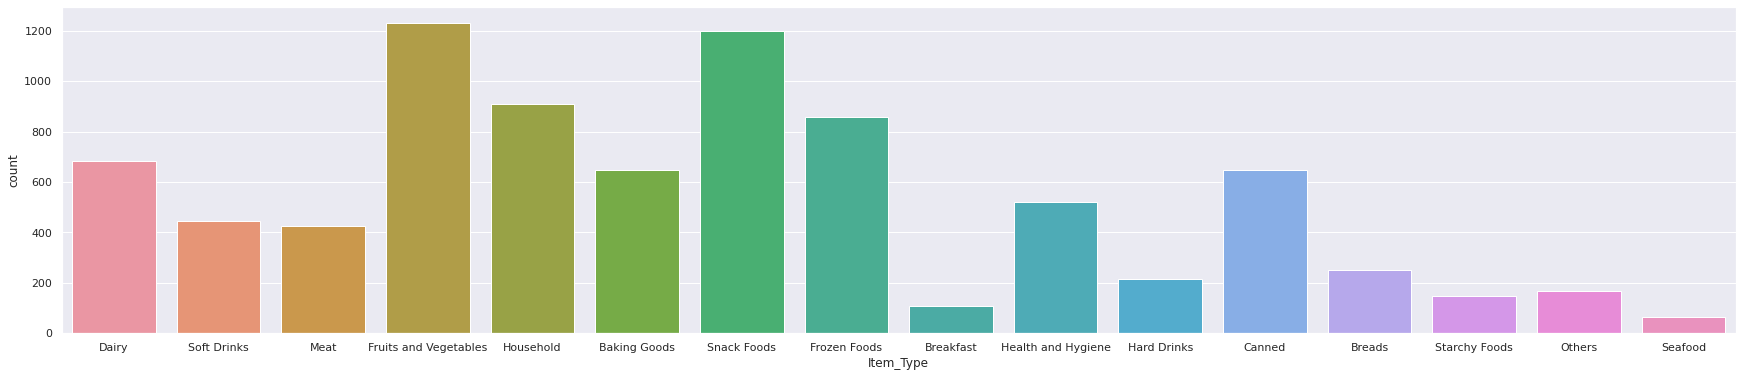

In [219]:
# Item_Tyoe distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data = big_mart_data)
plt.show()

Data Pre-Processing

In [220]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [221]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Label encoding

In [222]:
encoder = LabelEncoder()

In [223]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
                                                              
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])



In [224]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [225]:
X = big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [226]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [227]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training Data and Test Data

In [228]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [229]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model training 

XGBoost Regressor

In [230]:
regressor = XGBRegressor()

In [231]:
regressor.fit(X_train,Y_train)

[09:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [232]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [233]:
# R square Value

r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [234]:
print('R Squared value : ' ,r2_train)

R Squared value :  0.6376677682298715


In [235]:
# prediction on training data
test_data_prediction = regressor.predict(X_test)

In [236]:
# R square Value

r2_test = metrics.r2_score(Y_test,test_data_prediction)

In [237]:
print('R Squared value : ' ,r2_test)

R Squared value :  0.5881605982886744
